In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
brackets = pd.read_csv("./parsed_tax_brackets.csv")

In [11]:
gross_total_income = 180000+180000*0.12+180000*0.06 
gross_total_income = 81000
filing_type = 'single'
filing_year = 2017
print(gross_total_income)

81000


In [39]:
tax_brackets

,bracket_order,filing_type,year,rate,min_range,max_range,taxable_income
7,0,single,2017,0.100,0.0,9525.0,9525.0
8,1,single,2017,0.150,9525.0,38700.0,29175.0
9,2,single,2017,0.250,38700.0,82500.0,43800.0
10,3,single,2017,0.280,82500.0,157500.0,75000.0
11,4,single,2017,0.330,157500.0,200000.0,42500.0
12,5,single,2017,0.340,200000.0,500000.0,300000.0
13,6,single,2017,0.396,500000.0,500000.0,0.0


In [44]:
def get_federal_taxes(gross_total_income, filing_type, year):
    global brackets
    
    tax_brackets = brackets[
        (brackets['filing_type'] == filing_type) & 
        (brackets['year'] == year) 
        ].copy()
    
    taxes = 0
    taxable_income = gross_total_income
    tax_brackets.sort_values(by='bracket_order', inplace=True)
    test = gross_total_income
    last_bracket = False
    last_bracket_number = 0

    for index, row in tax_brackets.iterrows():

        # Max bracket (congrats, you're rich!)
        if row['taxable_income'] == 0:
            taxes += taxable_income * row['rate']
            last_bracket_number = row['bracket_order']

        # remainder taxes
        elif taxable_income - row['taxable_income'] <= 0: 
            last_bracket = True
            taxes += row['rate'] * taxable_income
            last_bracket_number = row['bracket_order']
            break

        # regular taxes
        else:
            taxable_income -= row['taxable_income']
            taxes += row['taxable_income'] * row['rate']

    return taxes, last_bracket_number

In [45]:
income = pd.DataFrame(pd.Series(data=np.linspace(start=0, stop=1000000, num=1000)), columns=['gross_income'])

In [48]:
income['filing_single_2017'] = income['gross_income'].apply(lambda x:get_federal_taxes(x, filing_type='single', year=2017)[0])
income['filing_single_2018'] = income['gross_income'].apply(lambda x:get_federal_taxes(x, filing_type='single', year=2018)[0])
income['filing_joint_2017'] = income['gross_income'].apply(lambda x:get_federal_taxes(x, filing_type='joint', year=2017)[0])
income['filing_joint_2018'] = income['gross_income'].apply(lambda x:get_federal_taxes(x, filing_type='joint', year=2018)[0])
income['effective_rate_single_2017'] = income['filing_single_2017'] / income['gross_income']
income['effective_rate_single_2018'] = income['filing_single_2018'] / income['gross_income']
income['effective_rate_joint_2017'] = income['filing_joint_2017'] / income['gross_income']
income['effective_rate_joint_2018'] = income['filing_joint_2018'] / income['gross_income']

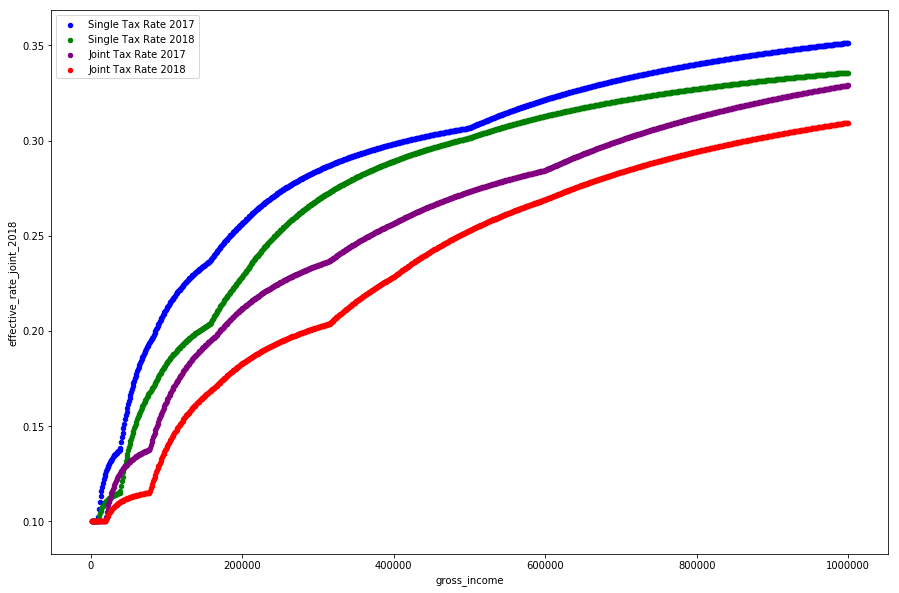

In [54]:
fig, ax = plt.subplots(figsize=(15,10))
income.plot(kind='scatter', x='gross_income', y='effective_rate_single_2017', color='blue', label='Single Tax Rate 2017', ax=ax)
income.plot(kind='scatter', x='gross_income', y='effective_rate_single_2018', color='green', label='Single Tax Rate 2018', ax=ax)
income.plot(kind='scatter', x='gross_income', y='effective_rate_joint_2017' , color='purple', label='Joint Tax Rate 2017', ax=ax)
income.plot(kind='scatter', x='gross_income', y='effective_rate_joint_2018' , color='red', label='Joint Tax Rate 2018', ax=ax)